## Following the trend of the Te by LPs on both inner/outer divertors

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from readStark import *
from rhosep2 import rhosep2
from getsig import getsig
plt.style.use('helvet2')

In [36]:
shotnr = 34875
te_in = readDivData('./Support_Files/3D_34875_te_in.dat')
te_ou = readDivData('./Support_Files/3D_34875_te_out.dat')

In [37]:
hfsrho = getsig(shotnr, 'RDL', 'HFSRHO')
lfsrho = getsig(shotnr, 'RDL', 'LFSRHO')

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


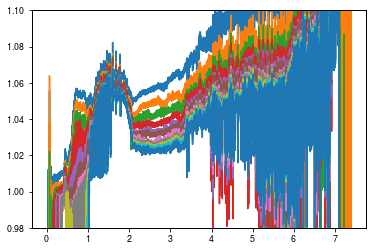

In [41]:
plt.plot(hfsrho.time, hfsrho.data)
plt.ylim(0.98, 1.1)
plt.show()

In [7]:
rsep2 = rhosep2(shotnr, te_in.time)

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/home/guimas/python/rhosep2.py:14: RuntimeWarning: invalid value encountered in sqrt
  rhoPol_Sep2[i] = np.sqrt((dPsi_AxisSep1.data + dPsi_Sep1Sep2.data)/dPsi_AxisSep1.data)[indexTime]


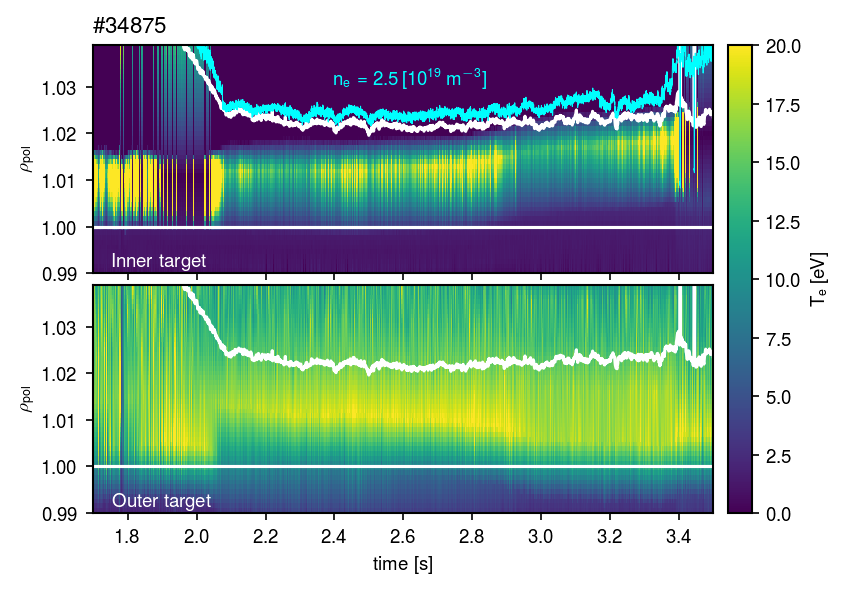

In [83]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(6,4), dpi=150)

ax[0].set_title('\#34875', loc='left')
ax[0].pcolormesh(te_in.time, te_in.deltas, te_in.data, shading='goraud', vmin=0.0, vmax=20)
ax[0].axhline(1.0, color='white')
ax[0].plot(te_in.time, rsep2, color=r'white')
ax[0].set_ylim(np.min(te_in.deltas)+0.01,np.max(te_in.deltas))
ax[0].set_ylabel(r'$\mathrm{\rho_{pol}}$')
ax[0].text(0.03, 0.03, 'Inner target', color='white', transform=ax[0].transAxes)

refclr = r'cyan'
ax[0].plot(hfsrho.time, hfsrho.data[:,9], color=refclr,lw=0.5)
ax[0].text(2.4, 1.03, r'$\mathrm{n_e=2.5\,[10^{19}\,m^{-3}]}$', color=refclr)

clm1 = ax[1].pcolormesh(te_ou.time, te_ou.deltas, te_ou.data, shading='goraud', vmin=0.0, vmax=20)
ax[1].axhline(1.0, color='white')
ax[1].plot(te_in.time, rsep2, color=r'white')
ax[1].set_ylim(np.min(te_in.deltas),np.max(te_in.deltas))
ax[1].set_ylim(np.min(te_in.deltas)+0.01,np.max(te_in.deltas))
ax[1].set_ylabel(r'$\mathrm{\rho_{pol}}$')
ax[1].text(0.03, 0.03, 'Outer target', color='white', transform=ax[1].transAxes)
ax[1].set_xlabel('time [s]')
ax[1].set_xlim(np.min(te_in.time),np.max(te_in.time))
plt.tight_layout()
plt.subplots_adjust(hspace=0.05, left=0.12, right=0.95)

clb = fig.colorbar(clm1, ax=ax.ravel().tolist(),pad=0.02)
clb.set_label(r'$\mathrm{T_{e}\,[eV]}$',rotation=90)

plt.savefig('./Figures/temp_LP_34875.png', dpi=200)
plt.show()